sizes<-seq(from = 10, to = 200, by = 10)<br>
reps<-10000<br>
<br>
sim.r.squared<-function(n) {<br>
    x <-rnorm(n)<br>
    y <-1 + x + rnorm(n)<br>
    model <-lm(y ~ x)<br>
    return(summary(model)$r.squared)<br>
    }<br>
    <br>
r.squared.q95 <-numeric(length(sizes))<br>
r.squared.q5 <-numeric(length(sizes))<br>
r.squared.mean<-numeric(length(sizes))<br>
<br>
system.time(<br>
    for (i in 1:length(sizes)) {<br>
        print(sizes[i])<br>
        result<-replicate(reps, sim.r.squared(sizes[i]))<br>
        r.squared.mean[i] <-mean(result)<br>
        r.squared.q5[i] <-quantile(result, 0.05)<br>
        r.squared.q95[i] <-quantile(result, 0.95)}<br>
        )<br>
<br>
<br>
plot(sizes, r.squared.mean,ylim=c(min(r.squared.q5), <br>
    max(r.squared.q95)),<br>
    xlab="samplesize", <br>
    ylab=expression(R^2))<br>
    <br>
    lines(sizes, r.squared.q5);<br> 
    lines(sizes, r.squared.q95)<br>

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
Wall time: 5min 48s


<AxesSubplot:xlabel='size'>

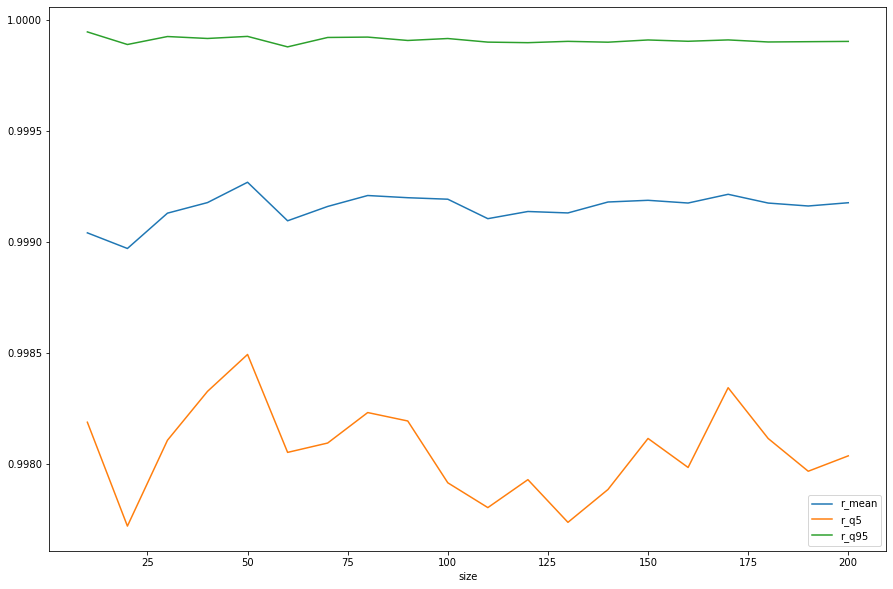

In [201]:
%%time

import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.DataFrame(columns=['size','r_mean','r_q5','r_q95'])


def r_squared (n, k, reps): 
    
    x, y = np.ones((n, k)), np.zeros((n))
    r2 = np.zeros((reps))
    
    for i in range(0,reps,1):
        x += np.random.normal(size=(n,k))
        y = 1 + x
        for v in range(0,len(y),1):
            y[v] += np.random.normal()
        model = LinearRegression()
        model.fit(y, x)
        r2[i] = model.score(y, x)
    
    return(r2)

def run(k, reps=10000, maxn=20):
    
    r_mean = np.zeros((maxn), dtype=np.float32)
    r_q5 = np.zeros((maxn), dtype=np.float32)
    r_q95 = np.zeros((maxn), dtype=np.float32)
    size = np.zeros((maxn), dtype=np.float32)
    for s in range(0,maxn,1):
        print((s+1)*10)
        size[s] = (s+1)*10
        result = r_squared((s+1)*10, k, reps)
        r_mean[s] = np.mean(result)
        r_q5[s] = np.quantile(result,0.05)
        r_q95[s] = np.quantile(result,0.95)
    
    df['r_mean']=pd.Series(r_mean)
    df['r_q5'] = pd.Series(r_q5)
    df['r_q95'] = pd.Series(r_q95)
    df['size'] = pd.Series(size)
    
    return (r_mean, r_q5, r_q95)
        
run(2)

# df.head(20)
df.set_index('size').plot(figsize=(15,10), x='size')